# Assignment 3: Adult Income Prediction

- Dataset: Adult Income Dataset from the UCI Machine Learning Repository

This dataset contains various attributes of individuals, and the task is to predict whether a person earns more than $50,000 per year.

https://archive.ics.uci.edu/dataset/2/adult

## Tasks:

### 1. Data Loading and Initial Exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Adult Income dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=column_names, skipinitialspace=True)

In [2]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2. Data Preparation:

#### - This dataset has missing data that is filled with '?' where the data is missing. To better handle missing data, replace it with a null value and then drop it.

In [4]:
# Identify and handle missing values
df.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN for better handling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

### 3. Feature Engineering:

#### NOTE: Before doing this task, make sure that you read the post that I wrote in the channel about Dummy Encoding. Watch the videos and check the Jupyter file to see a simple example.

In [7]:
# Convert categorical variables into a suitable format for analysis
# Encode these columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

In [20]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# Display the updated DataFrame
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### 4. Exploratory Data Analysis (EDA):

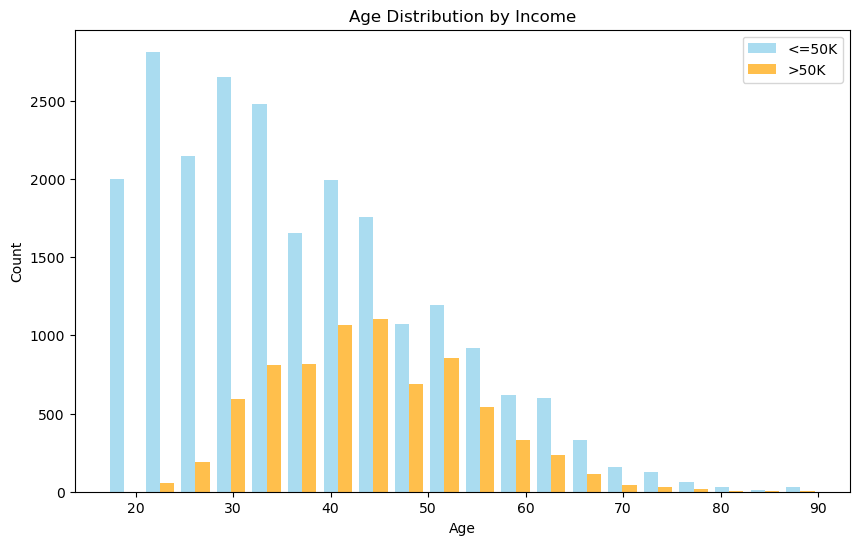

In [9]:
# Explore age distribution by income
plt.figure(figsize=(10, 6))
plt.hist([df[df['income'] == '<=50K']['age'], df[df['income'] == '>50K']['age']], bins=20, color=['skyblue', 'orange'], label=['<=50K', '>50K'], alpha=0.7)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

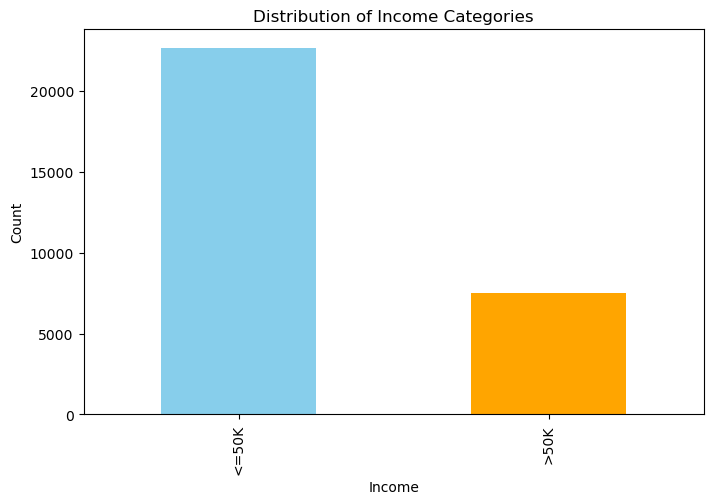

In [10]:
# Analyze the distribution of income categories
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Income Categories')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

### 5. Model Training:

#### Note: 
1. It's a good practice to try multiple algorithms and compare their performance using appropriate evaluation metrics.
2. Your accuracy may differ from the one you see here according to your data splitting and using the random_state parameter.

In [11]:
# Import necessary libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)


In [13]:
# Evaluate the performance of the model using accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7894911321067463


In [14]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [15]:
# Evaluate the performance of the model using accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8130283441074092


In [16]:
# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [17]:
# Evaluate the performance of the model using accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8498259572352064


In [18]:
# Train a SVM model
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)


In [19]:
# Evaluate the performance of the model using accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7818664014586442


### Additional Notes:

- You are encouraged to experiment with different features, algorithms, and hyperparameters to improve model performance.